In [1]:
import numpy as np
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader
import datetime
import pandas_datareader.data as web
from scipy.stats import norm
import yfinance as yf
import cufflinks as cf
cf.go_offline()

In [2]:
tickers = ['PRAJIND.NS','MARKSANS.NS','BEL.NS','WENDT.NS','CIGNITITEC.NS','XPROINDIA.NS','TIMKEN.BO'
           ,'VIMTALABS.BO','ELGIEQUIP.NS','APOLLOPIPE.NS']


In [3]:
data = pd.DataFrame()

data = yf.download(tickers,period="4y")
     
data = data['Adj Close']
        
data.to_csv("//Users//sjacob//stocks//VALUESTOCKJUNE2023.csv")
data.dropna()

[*********************100%***********************]  10 of 10 completed


,APOLLOPIPE.NS,BEL.NS,CIGNITITEC.NS,ELGIEQUIP.NS,MARKSANS.NS,PRAJIND.NS,TIMKEN.BO,VIMTALABS.BO,WENDT.NS,XPROINDIA.NS
Date,,,,,,,,,,
2019-11-11,125.179718,33.169865,293.149597,127.589188,14.959182,106.175369,858.283813,97.129745,2821.880127,14.076563
2019-11-13,124.248146,33.246052,294.628113,125.503441,14.516311,103.748222,869.228516,96.731674,2803.814941,14.975066
2019-11-14,123.416389,33.307003,304.386658,125.599350,14.024233,102.986763,889.118835,97.129745,2685.944336,15.174733
2019-11-15,118.741905,33.901215,305.618774,125.167809,14.024233,106.032593,873.126587,93.994926,2729.280762,15.141456
2019-11-18,123.316582,33.489834,316.510864,124.184883,15.008389,107.412727,867.879089,92.004562,2706.379883,15.108178
...,...,...,...,...,...,...,...,...,...,...
2023-06-19,708.299988,124.849998,898.450012,534.150024,91.449997,393.299988,3485.500000,405.437073,9782.349609,866.349976
2023-06-20,711.549988,125.150002,887.000000,531.700012,92.650002,392.750000,3249.699951,413.100006,9738.750000,871.799988
2023-06-21,733.650024,122.800003,873.700012,540.150024,94.949997,386.350006,3271.399902,408.750000,9802.900391,867.150024


In [4]:
returns = np.log(data / data.shift(1))
vols = returns.std() * 252 ** 0.5 *100
vols

APOLLOPIPE.NS    45.056666
BEL.NS           39.351365
CIGNITITEC.NS    43.890446
ELGIEQUIP.NS     48.043965
MARKSANS.NS      53.607834
PRAJIND.NS       48.782306
TIMKEN.BO        39.602139
VIMTALABS.BO     56.918875
WENDT.NS         43.014679
XPROINDIA.NS     60.460670
dtype: float64

In [5]:
annual_returns = returns.mean() * 252 * 100
annual_returns

APOLLOPIPE.NS    48.595112
BEL.NS           31.779631
CIGNITITEC.NS    25.952361
ELGIEQUIP.NS     37.303048
MARKSANS.NS      38.058126
PRAJIND.NS       26.690692
TIMKEN.BO        40.603068
VIMTALABS.BO     22.006229
WENDT.NS         35.622465
XPROINDIA.NS     93.122008
dtype: float64

In [6]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import pandas_datareader.data as web
import datetime
import math

class ValueAtRiskMonteCarlo:
    
    def __init__(self, S, mu, sigma, c, n, iterations):
        self.S = S
        self.mu = mu
        self.sigma = sigma
        self.c = c
        self.n = n
        self.iterations = iterations 

    def simulation(self):
        stock_data = np.zeros([self.iterations, 1])	
        rand = np.random.normal(0, 1, [1, self.iterations])

        #equation for the S(t) stock price
        stock_price = self.S*np.exp(self.n*(self.mu - 0.5*self.sigma**2)+self.sigma*np.sqrt(self.n)*rand)
        #we have to sort the stock prices to determine the percentile
        stock_price = np.sort(stock_price)

        #it depends on the confidence level: 95% -> 5 and 99% -> 1
        percentile = np.percentile(stock_price,(1-self.c)*100)

        return self.S-percentile

In [7]:

df = pd.DataFrame(columns = ['Ticker', 'Cov_mar','Market_var','Beta','Volatility%','Return%','CV','Sharp Ratio','CAGR','MAXDD%','Value at Risk']) 
data = pd.DataFrame()
data['^BSESN'] = yf.download('^BSESN',period="3y").Close
 

for t in tickers:
    try:
        data[t] = yf.download(t,period="3y").Close 
    except:
        continue
    sec_returns = np.log( data / data.shift(1) )
    cov = sec_returns.cov()*252
    cov_with_market = cov[t][0]
 
      
    dr = data[t].pct_change()
    dcum = (1 + dr).cumprod()
    n = len(data)/252
    CAGR = ((dcum[-1])**(1/n) - 1)*100
      
 
    
    droll = dcum.cummax()
    ddw = droll - dcum
    ddmax = ddw/droll
    max_dd = (ddmax.max())*100
   
 

    market_var = sec_returns['^BSESN'].var() * 252

    returns = np.log(data[t] / data[t].shift(1))
    MSFT_beta = cov_with_market / market_var
    MSFT_er = returns.mean()*252
    Sharp = (MSFT_er - 0.05) / (sec_returns[t].std() * 252 ** 0.5)
   

    #returns = np.log(data[t] / data[t].shift(1))
    vols = returns.std() * 252 ** 0.5 *100
    annual_returns = returns.mean() * 252 * 100
    CV = (vols/annual_returns)*100
    S = 100000    #this is the investment (stocks or whatever)
    c=0.95   #condifence level: this time it is 99%
    n = 730   #1 day 
    iterations = 100000 #number of paths in the Monte-Carlo simulation
    mu = np.mean(returns)
    sigma = np.mean(returns.std())

    model = ValueAtRiskMonteCarlo(S,mu,sigma,c,n,iterations)
    val = model.simulation()

 
    
 
    df = df.append(pd.Series([t,cov_with_market,market_var,MSFT_beta,vols,annual_returns,CV,Sharp,CAGR,max_dd,val], index=df.columns ), ignore_index=True)
                                    
                        
  

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_63514/2279341807.py:55: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_63514/2279341807.py:55: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_63514/2279341807.py:55: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_63514/2279341807.py:55: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_63514/2279341807.py:55: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_63514/2279341807.py:55: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_63514/2279341807.py:55: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_63514/2279341807.py:55: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_63514/2279341807.py:55: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_63514/2279341807.py:55: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [8]:
df1 = df[(df['CAGR']>10 ) & (df['Return%']>10)]
df2 = df1.sort_values(by='Return%', ascending=False)
df2

,Ticker,Cov_mar,Market_var,Beta,Volatility%,Return%,CV,Sharp Ratio,CAGR,MAXDD%,Value at Risk
5,XPROINDIA.NS,0.017417,0.024744,0.703878,57.712328,140.926070,40.952202,2.355235,308.521411,49.866774,-624069.213496
8,ELGIEQUIP.NS,0.013535,0.024744,0.546987,49.740552,64.686030,76.895355,1.199947,90.788320,38.448668,-13754.640547
9,APOLLOPIPE.NS,0.017221,0.024744,0.695962,42.474398,61.294922,69.295133,1.325385,84.435325,38.477740,-37564.085985
0,PRAJIND.NS,0.023685,0.024744,0.957198,46.284616,58.092024,79.674650,1.147077,78.629308,33.285618,-7543.105943
7,VIMTALABS.BO,0.014796,0.024744,0.597966,52.305307,51.800156,100.975193,0.894750,66.015007,40.126096,30012.825323
2,BEL.NS,0.021205,0.024744,0.856956,33.747808,49.456591,68.237230,1.317318,63.870098,24.389182,-38803.382574
6,TIMKEN.BO,0.012113,0.024744,0.489526,37.753154,44.409599,85.011246,1.043876,52.106390,24.430418,-2683.387704
3,WENDT.NS,0.014803,0.024744,0.598249,40.454063,43.105964,93.847948,0.941956,53.799956,24.626962,11054.619985
4,CIGNITITEC.NS,0.012786,0.024744,0.516705,40.614214,36.975797,109.839998,0.787306,44.666799,43.136955,26906.316379
1,MARKSANS.NS,0.020970,0.024744,0.847451,45.401112,30.789041,147.458674,0.568027,35.999122,58.276045,48960.691188


In [9]:
df2.to_csv("//Users//sjacob//stocks//VALUEJUN23.csv")

In [10]:
pf_data = pd.DataFrame()
for t in df1["Ticker"]:
    pf_data[t] =  yf.download(t,period="3y").Close 

log_returns = np.log(pf_data / pf_data.shift(1))
num_assets = len(df1["Ticker"])
num_assets
weights = np.random.random(num_assets)
weights /= np.sum(weights)
np.sum(weights * log_returns.mean()) * 252
np.dot(weights.T, np.dot(log_returns.cov() * 252, weights))
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 252, weights)))
pfolio_returns = []
pfolio_volatilities = []
wts = []
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 252)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 252, weights))))
    wts.append(weights)
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
wts= np.array(wts)
pfolio_returns, pfolio_volatilities
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})
#portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
#plt.xlabel('Expected Volatility')
#plt.ylabel('Expected Return')


portfolios.iplot(kind="scatter",
              x="Volatility", y='Return',
              mode='markers',
              xTitle="Volatility", yTitle="Return",
              title="========Volatility-------Return=========================",theme="solar")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [59]:
portfolios

,Return,Volatility
0,0.568169,0.230865
1,0.503929,0.218609
2,0.617938,0.217204
3,0.613591,0.221987
4,0.619013,0.229730
...,...,...
995,0.619370,0.221806
996,0.535981,0.227047
997,0.514890,0.235829
998,0.616194,0.252025


In [11]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import pandas_datareader.data as web
import datetime
import math

class ValueAtRiskMonteCarlo:
    
    def __init__(self, S, mu, sigma, c, n, iterations):
        self.S = S
        self.mu = mu
        self.sigma = sigma
        self.c = c
        self.n = n
        self.iterations = iterations 

    def simulation(self):
        stock_data = np.zeros([self.iterations, 1])	
        rand = np.random.normal(0, 1, [1, self.iterations])

        #equation for the S(t) stock price
        stock_price = self.S*np.exp(self.n*(self.mu - 0.5*self.sigma**2)+self.sigma*np.sqrt(self.n)*rand)
        #we have to sort the stock prices to determine the percentile
        stock_price = np.sort(stock_price)

        #it depends on the confidence level: 95% -> 5 and 99% -> 1
        percentile = np.percentile(stock_price,(1-self.c)*100)

        return self.S-percentile

if __name__ == "__main__":
    S = 100000    #this is the investment (stocks or whatever)
    c=0.95   #condifence level: this time it is 99%
    n = 730   #1 day 
    iterations = 100000 #number of paths in the Monte-Carlo simulation

    #historical data to approximate mean and standard deviation
    d = {}

    #download stock related data from Yahoo Finance
    for t in df1["Ticker"]:
        citi = yf.download(t,period="3y")
           #we can use pct_change() to calculate daily returns
        citi['returns'] = citi['Close'].pct_change()

    #we can assume daily returns to be normally sidtributed: mean and variance (standard deviation)
    #can describe the process
        mu = np.mean(citi['returns'])
        sigma = np.std(citi['returns'])

        model = ValueAtRiskMonteCarlo(S,mu,sigma,c,n,iterations)
        val = model.simulation()
        d[t] = val
        print("VALUE AT RSIK for {} is".format(t))
        print('Value at risk with Monte-Carlo simulation in INR: %0.2f' % val)
    print("The minimum value at risk for the portofolios are:")
    print(min(d.values()))

[*********************100%***********************]  1 of 1 completed
VALUE AT RSIK for PRAJIND.NS is
Value at risk with Monte-Carlo simulation in INR: -46923.90
[*********************100%***********************]  1 of 1 completed
VALUE AT RSIK for MARKSANS.NS is
Value at risk with Monte-Carlo simulation in INR: 33804.44
[*********************100%***********************]  1 of 1 completed
VALUE AT RSIK for BEL.NS is
Value at risk with Monte-Carlo simulation in INR: -60778.85
[*********************100%***********************]  1 of 1 completed
VALUE AT RSIK for WENDT.NS is
Value at risk with Monte-Carlo simulation in INR: -6786.33
[*********************100%***********************]  1 of 1 completed
VALUE AT RSIK for CIGNITITEC.NS is
Value at risk with Monte-Carlo simulation in INR: 7325.39
[*********************100%***********************]  1 of 1 completed
VALUE AT RSIK for XPROINDIA.NS is
Value at risk with Monte-Carlo simulation in INR: -1047276.68
[*********************100%**********

In [12]:
for key,value in d.items():
    print(" The Value at risk per 1L invested in stock {} is {:0.2f}".format(key,value))

 The Value at risk per 1L invested in stock PRAJIND.NS is -46923.90
 The Value at risk per 1L invested in stock MARKSANS.NS is 33804.44
 The Value at risk per 1L invested in stock BEL.NS is -60778.85
 The Value at risk per 1L invested in stock WENDT.NS is -6786.33
 The Value at risk per 1L invested in stock CIGNITITEC.NS is 7325.39
 The Value at risk per 1L invested in stock XPROINDIA.NS is -1047276.68
 The Value at risk per 1L invested in stock TIMKEN.BO is -15647.55
 The Value at risk per 1L invested in stock VIMTALABS.BO is 2184.32
 The Value at risk per 1L invested in stock ELGIEQUIP.NS is -55457.43
 The Value at risk per 1L invested in stock APOLLOPIPE.NS is -72391.85


In [13]:
df2.reset_index(inplace = True)

In [14]:

df2.iplot(kind="scatter",
              x="CV", y='Value at Risk',
              mode='markers',
              xTitle="CV", yTitle="Value at Risk",
              title="========CV-------VAR=========================", categories="Ticker",theme="solar")

/Users/sjacob/Library/Python/3.9/lib/python/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

/Users/sjacob/Library/Python/3.9/lib/python/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



In [15]:

df1.iplot(kind="scatter",
              x="Return%", y='Volatility%',
              mode='markers',
              xTitle="Return", yTitle="Volatility",
              title="========Return-------Volatility=========================", categories="Ticker",theme="solar")

In [16]:

df2.iplot(kind="scatter",
              x="Return%", y='CV',
              mode='markers',
              xTitle="Return", yTitle="CV",
              title="========Return-------CV========================", categories="Ticker",theme="solar")

In [17]:

df2.iplot(kind="scatter",
              x="Volatility%", y='Value at Risk',
              mode='markers',
              xTitle="Volatility", yTitle="VAR",
              title="========VOL------VAR========================", categories="Ticker",theme="solar")

In [18]:
norm = data.div(data.iloc[0,:]).mul(100)
norm.iplot(title="Comparision Analysis",xTitle='Date',yTitle="Normalized Price", fill = True, theme="pearl")

In [19]:
norm.iplot(title="Comparision Analysis",xTitle='Date',yTitle="Normalized Price", fill = True, theme="pearl")

In [20]:
ret = data.pct_change().dropna()

ret.iplot(kind="hist", bins=50, histnorm=None,theme="pearl")

In [21]:

df2.iplot(kind="scatter",
              x="Volatility%", y='CV',
              mode='markers',
              xTitle="Volatility", yTitle="CV",
              title="========VOL------CV========================", categories="Ticker",theme="solar")

In [22]:
df2.iplot(kind="scatter",
              x="Return%", y='Value at Risk',
              mode='markers',
              xTitle="Return", yTitle="VAR",
              title="========Return------VAR========================", categories="Ticker",theme="solar")

In [23]:

df2.iplot(kind="scatter",
              x="Return%", y='CV',
              mode='markers',
              xTitle="Return", yTitle="CV",
              title="========Return-------CV========================", categories="Ticker",theme="solar")

In [24]:

df1.iplot(kind="scatter",
              x="Return%", y='Volatility%',
              mode='markers',
              xTitle="Return", yTitle="Volatility",
              title="========Return-------Volatility=========================", categories="Ticker",theme="solar")

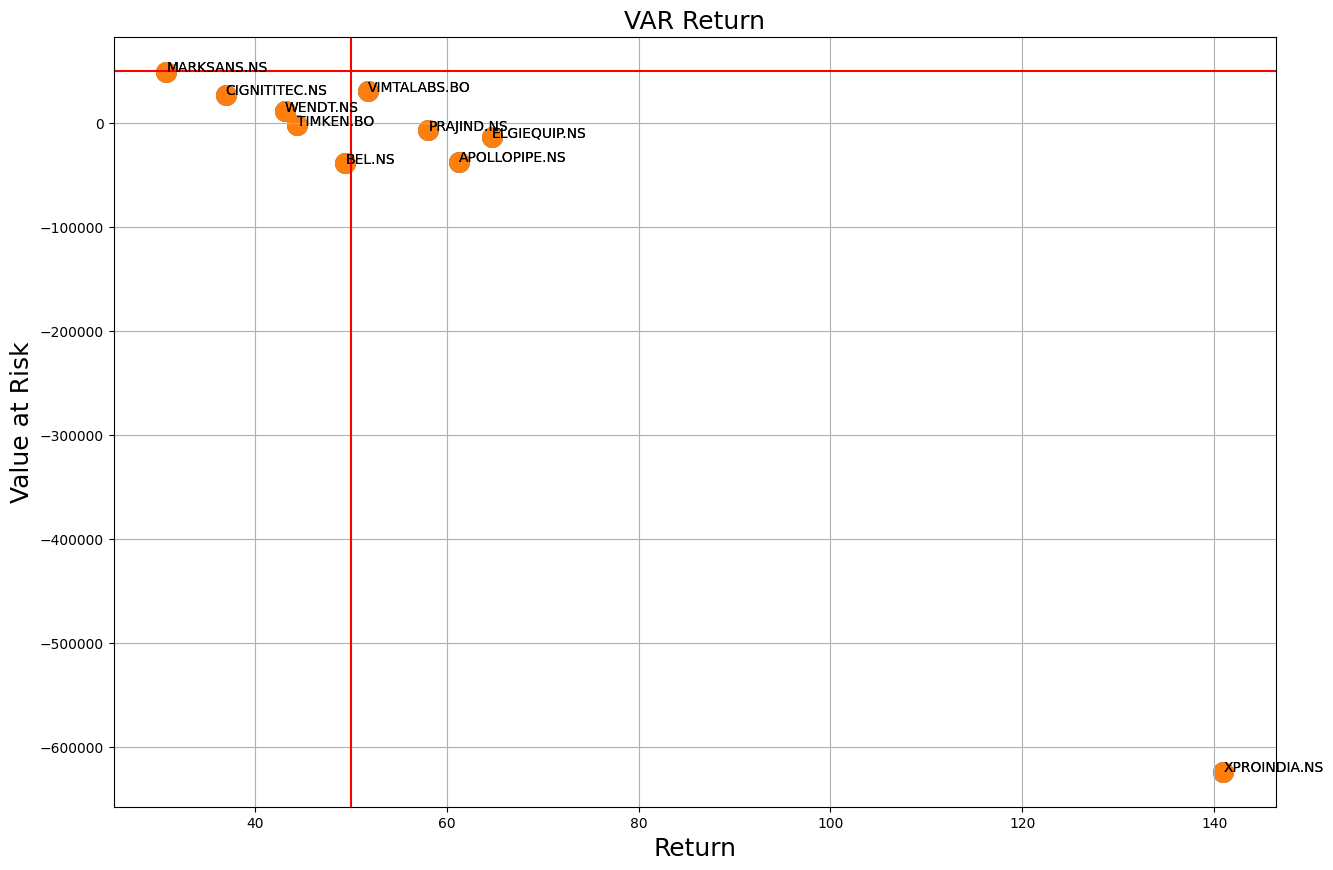

In [25]:
plt.figure(figsize=[15,10])
x= df2['Return%']
y = df2['Value at Risk']
annotations = df2["Ticker"]
plt.grid(True)
plt.title('VAR Return', fontsize=18, color='black')
plt.xlabel("Return",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

plt.show()

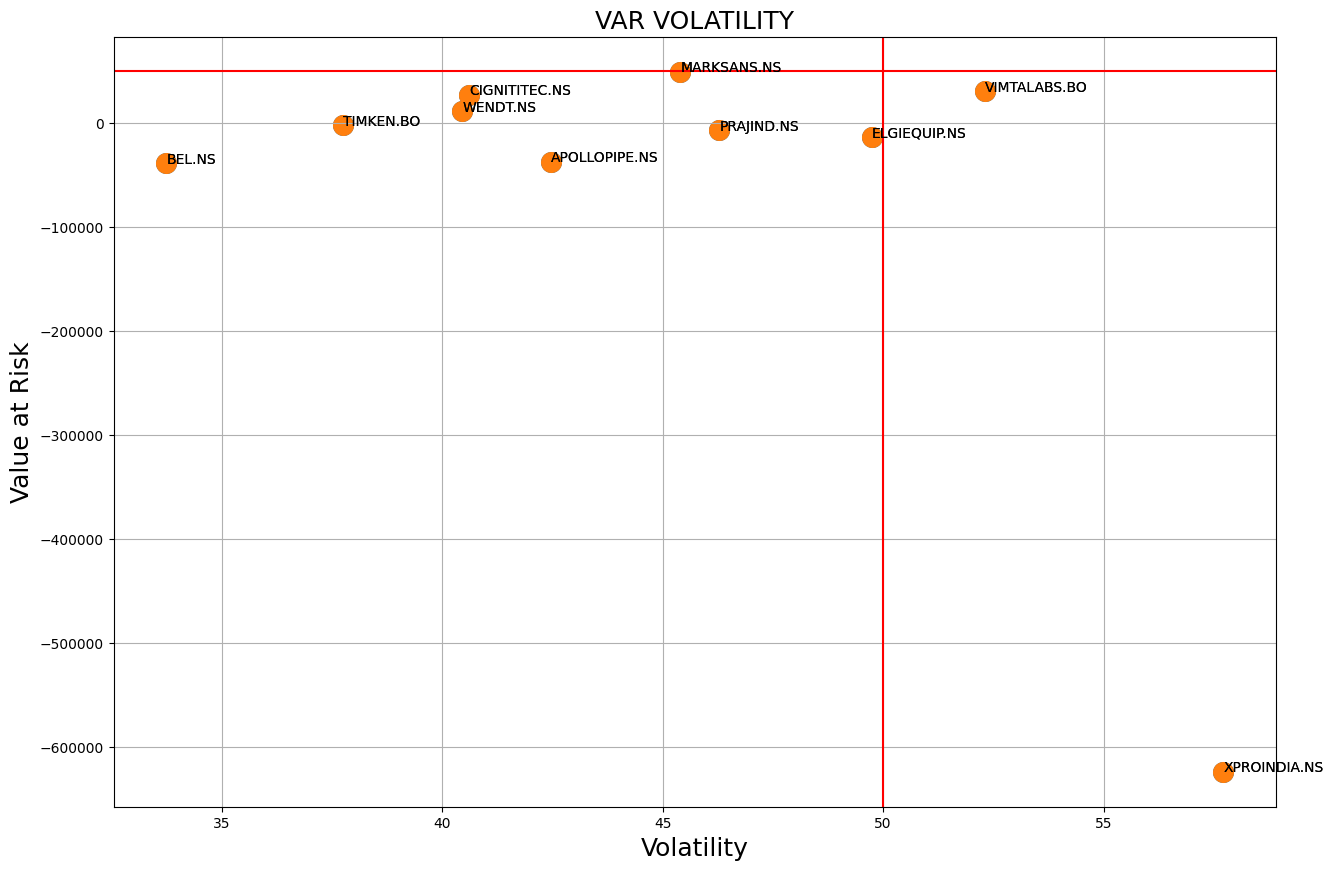

In [26]:
plt.figure(figsize=[15,10])
x= df2['Volatility%']
y = df2['Value at Risk']
annotations = df2["Ticker"]
plt.grid(True)
plt.title('VAR VOLATILITY', fontsize=18, color='black')
plt.xlabel("Volatility",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

plt.show()

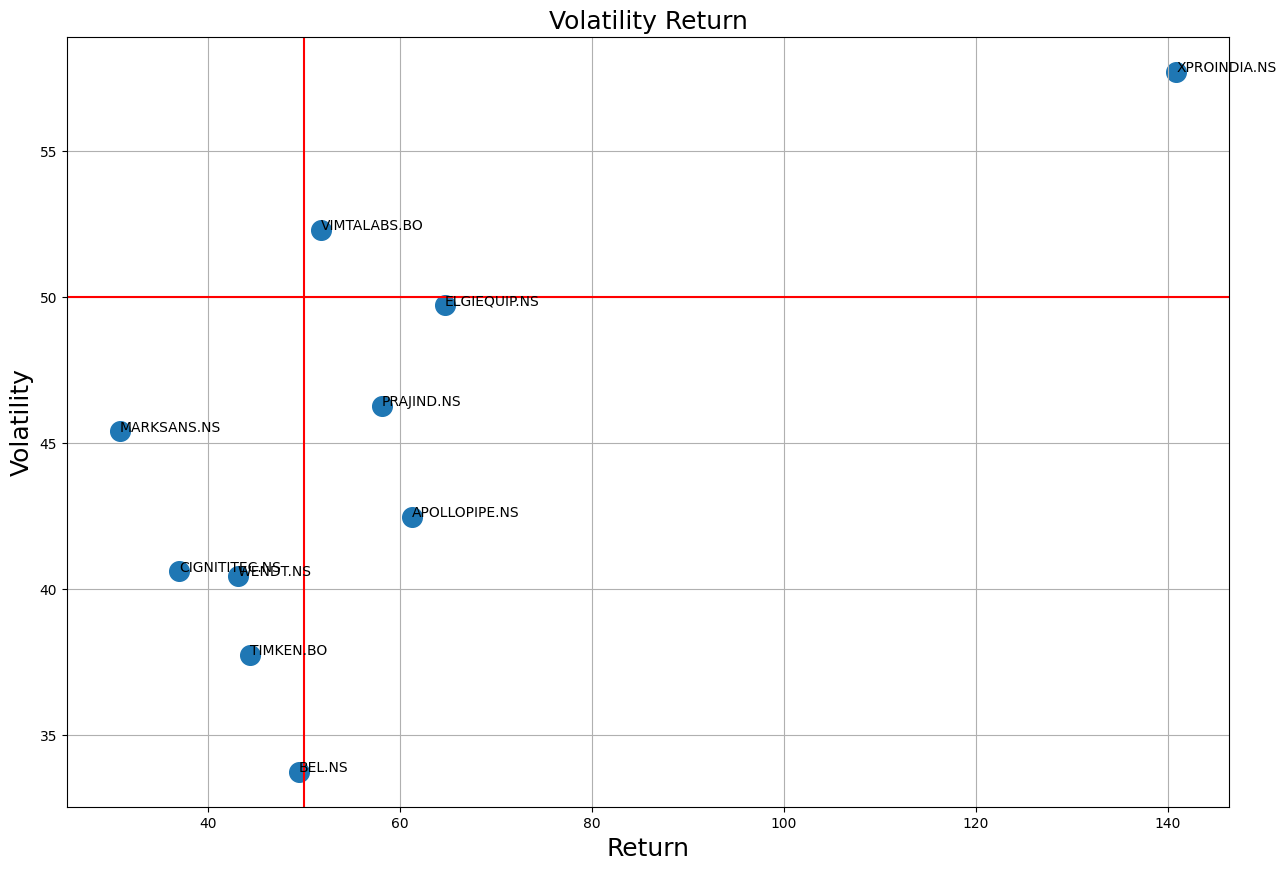

In [27]:
plt.figure(figsize=[15,10])
x= df2['Return%']
y = df2['Volatility%']
annotations = np.array(df2["Ticker"])
plt.grid(True)
plt.title('Volatility Return', fontsize=18, color='black')
plt.xlabel("Return",fontsize=18, color='black')
plt.ylabel("Volatility", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
i=0
for labels in annotations:
    plt.annotate(labels, (x[i], y[i]))
    i=i+1
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50, color='r', linestyle='-')
plt.show()

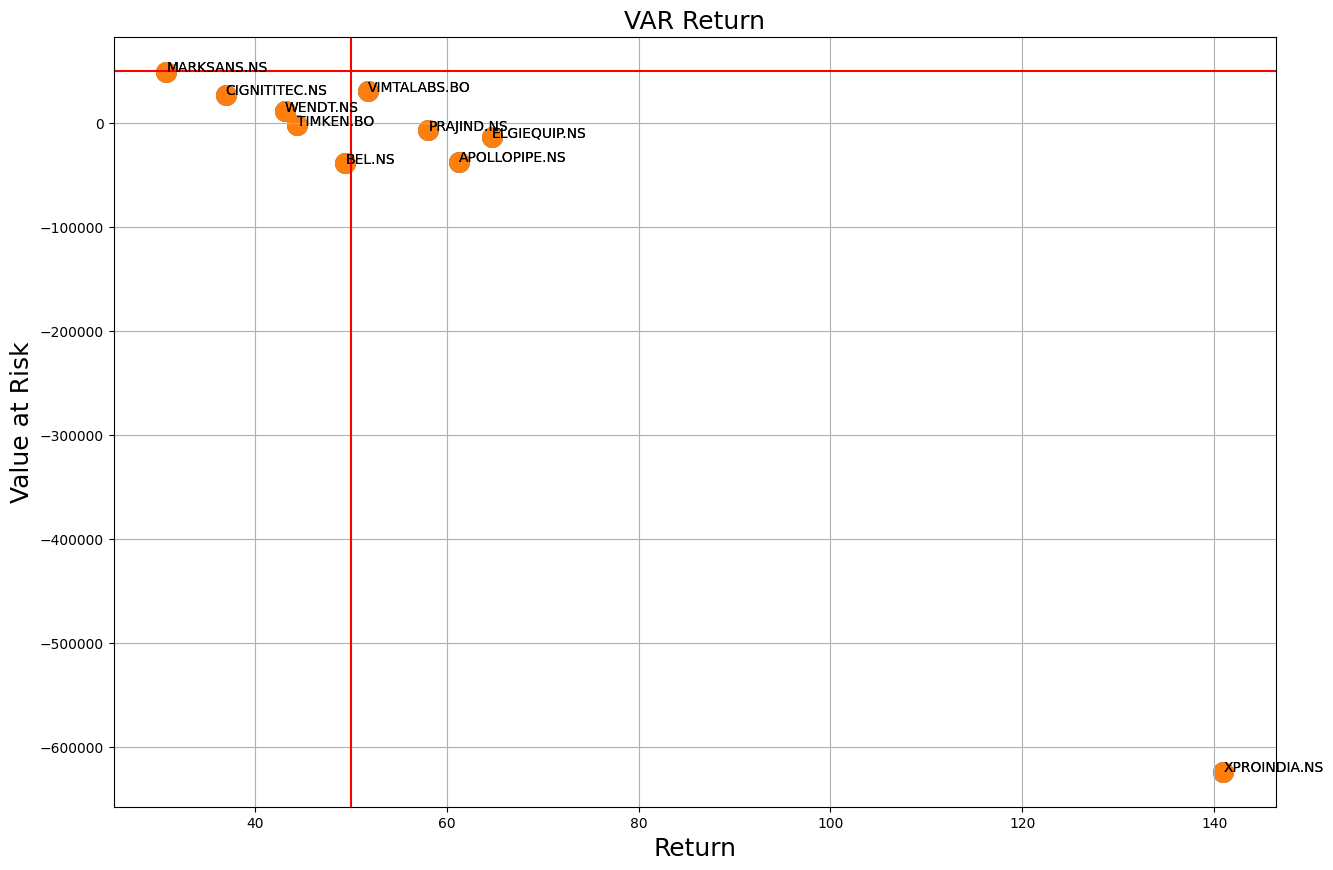

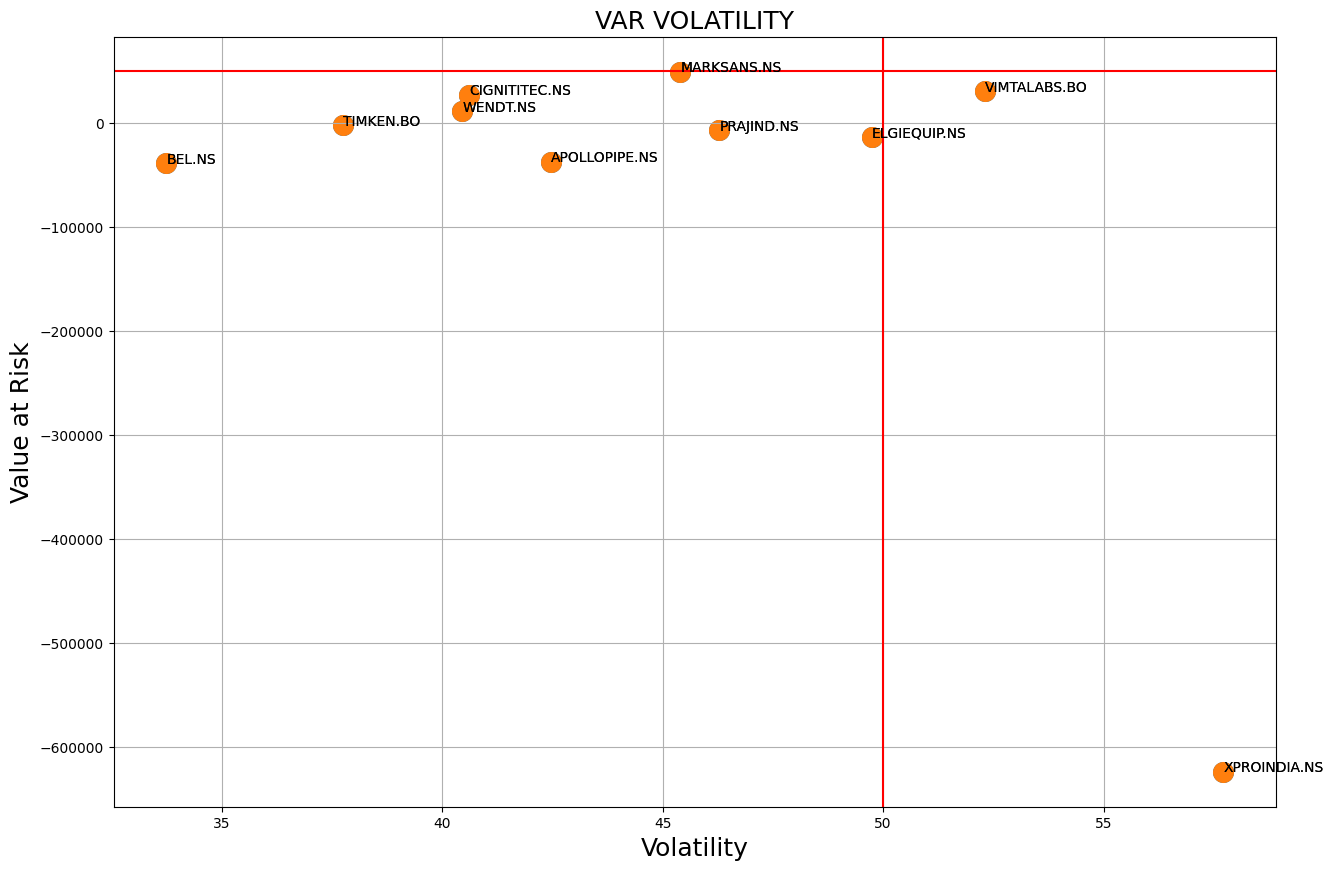

In [28]:
plt.figure(figsize=[15,10])
x= df2['Return%']
y = df2['Value at Risk']
annotations = df2["Ticker"]
plt.grid(True)
plt.title('VAR Return', fontsize=18, color='black')
plt.xlabel("Return",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

plt.figure(figsize=[15,10])
x= df2['Volatility%']
y = df2['Value at Risk']
annotations = df2["Ticker"]
plt.grid(True)
plt.title('VAR VOLATILITY', fontsize=18, color='black')
plt.xlabel("Volatility",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

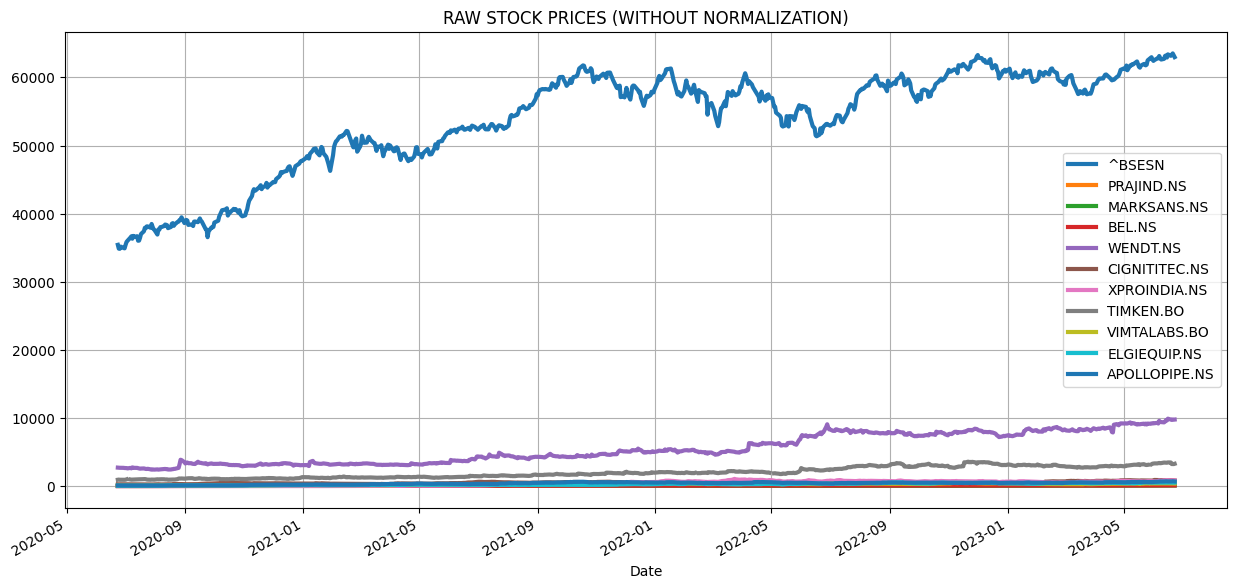

In [29]:
stocks_df = data
def show_plot(df, fig_title):
  df.plot(x = 'Date', figsize = (15,7), linewidth = 3, title = fig_title)
  plt.grid()
  plt.show()
stocks_df = stocks_df.reset_index()
show_plot(stocks_df, 'RAW STOCK PRICES (WITHOUT NORMALIZATION)')

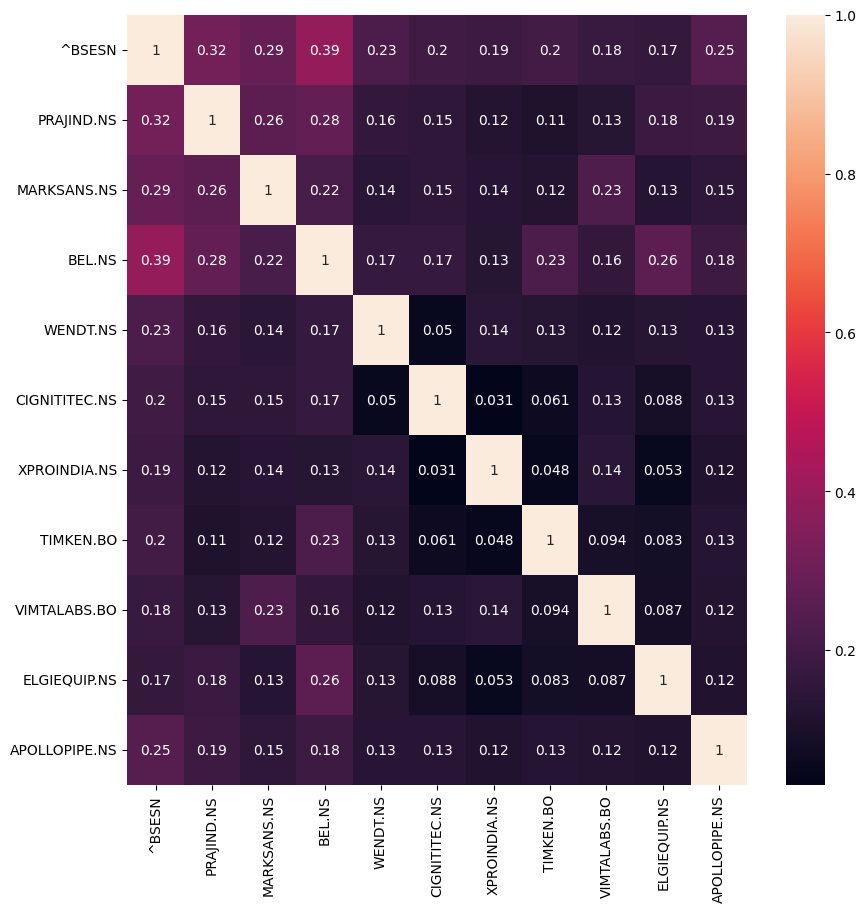

In [30]:
def daily_return(df):
  df_daily_return = df.copy()

  # Loop through each stock (while ignoring time columns with index 0)
  for i in df.columns[1:]:
    
    # Loop through each row belonging to the stock
    for j in range(1, len(df)):

      # Calculate the percentage of change from the previous day
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
    
    # set the value of first row to zero since the previous value is not available
    df_daily_return[i][0] = 0
  
  return df_daily_return

# Get the daily returns 
stocks_daily_return = daily_return(stocks_df)

# Daily Return Correlation
cm = stocks_daily_return.drop(columns = ['Date']).corr()

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
plt.figure(figsize=(10, 10))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax);

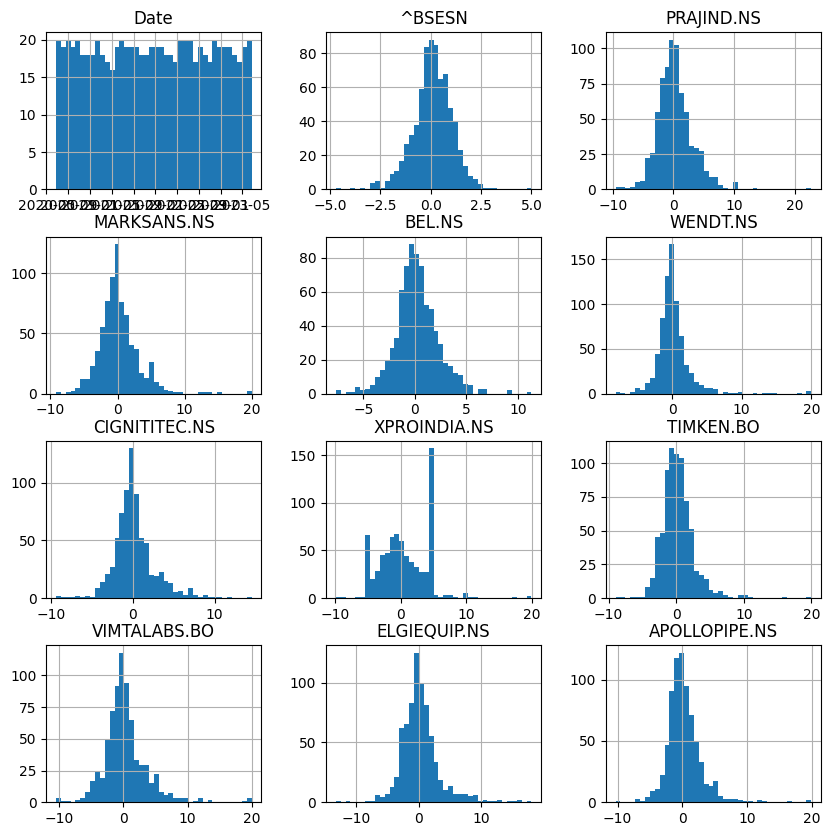

In [31]:
# Histogram of daily returns
# Stock returns are normally distributed with zero mean 
# Notice how Tesla Standard deviation is high indicating a more volatile stock
stocks_daily_return.hist(figsize=(10, 10), bins = 40);

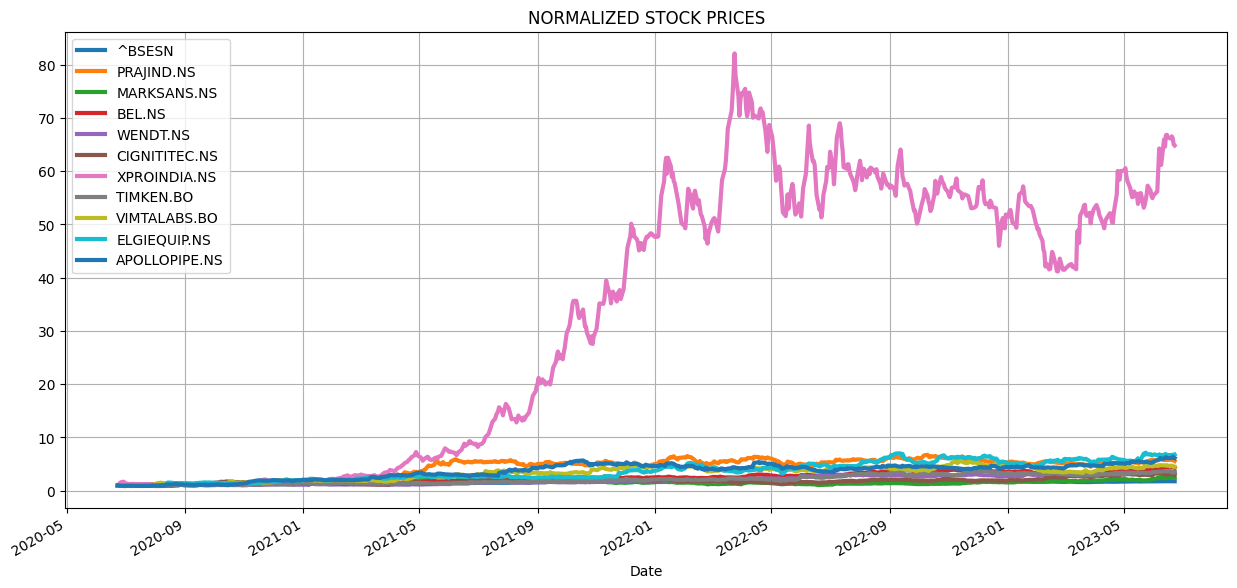

In [32]:
# Function to normalize the prices based on the initial price
# The function simply divides every stock by it's price at the start date (i.e.: Date = 2012-01-12)	
def normalize(df):
  x = df.copy()

  # Loop through each stock (while ignoring time columns with index 0)
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

# Plot normalized data
# Notice the massive gains in Tesla Stock compared to Amazon (second place)
show_plot(normalize(stocks_df), 'NORMALIZED STOCK PRICES')

In [33]:
patterns = {
    'CDL2CROWS':'Two Crows',
    'CDL3BLACKCROWS':'Three Black Crows',
    'CDL3INSIDE':'Three Inside Up/Down',
    'CDL3LINESTRIKE':'Three-Line Strike',
    'CDL3OUTSIDE':'Three Outside Up/Down',
    'CDL3STARSINSOUTH':'Three Stars In The South',
    'CDL3WHITESOLDIERS':'Three Advancing White Soldiers',
    'CDLABANDONEDBABY':'Abandoned Baby',
    'CDLADVANCEBLOCK':'Advance Block',
    'CDLBELTHOLD':'Belt-hold',
    'CDLBREAKAWAY':'Breakaway',
    'CDLCLOSINGMARUBOZU':'Closing Marubozu',
    'CDLCONCEALBABYSWALL':'Concealing Baby Swallow',
    'CDLCOUNTERATTACK':'Counterattack',
    'CDLDARKCLOUDCOVER':'Dark Cloud Cover',
    'CDLDOJI':'Doji',
    'CDLDOJISTAR':'Doji Star',
    'CDLDRAGONFLYDOJI':'Dragonfly Doji',
    'CDLENGULFING':'Engulfing Pattern',
    'CDLEVENINGDOJISTAR':'Evening Doji Star',
    'CDLEVENINGSTAR':'Evening Star',
    'CDLGAPSIDESIDEWHITE':'Up/Down-gap side-by-side white lines',
    'CDLGRAVESTONEDOJI':'Gravestone Doji',
    'CDLHAMMER':'Hammer',
    'CDLHANGINGMAN':'Hanging Man',
    'CDLHARAMI':'Harami Pattern',
    'CDLHARAMICROSS':'Harami Cross Pattern',
    'CDLHIGHWAVE':'High-Wave Candle',
    'CDLHIKKAKE':'Hikkake Pattern',
    'CDLHIKKAKEMOD':'Modified Hikkake Pattern',
    'CDLHOMINGPIGEON':'Homing Pigeon',
    'CDLIDENTICAL3CROWS':'Identical Three Crows',
    'CDLINNECK':'In-Neck Pattern',
    'CDLINVERTEDHAMMER':'Inverted Hammer',
    'CDLKICKING':'Kicking',
    'CDLKICKINGBYLENGTH':'Kicking - bull/bear determined by the longer marubozu',
    'CDLLADDERBOTTOM':'Ladder Bottom',
    'CDLLONGLEGGEDDOJI':'Long Legged Doji',
    'CDLLONGLINE':'Long Line Candle',
    'CDLMARUBOZU':'Marubozu',
    'CDLMATCHINGLOW':'Matching Low',
    'CDLMATHOLD':'Mat Hold',
    'CDLMORNINGDOJISTAR':'Morning Doji Star',
    'CDLMORNINGSTAR':'Morning Star',
    'CDLONNECK':'On-Neck Pattern',
    'CDLPIERCING':'Piercing Pattern',
    'CDLRICKSHAWMAN':'Rickshaw Man',
    'CDLRISEFALL3METHODS':'Rising/Falling Three Methods',
    'CDLSEPARATINGLINES':'Separating Lines',
    'CDLSHOOTINGSTAR':'Shooting Star',
    'CDLSHORTLINE':'Short Line Candle',
    'CDLSPINNINGTOP':'Spinning Top',
    'CDLSTALLEDPATTERN':'Stalled Pattern',
    'CDLSTICKSANDWICH':'Stick Sandwich',
    'CDLTAKURI':'Takuri (Dragonfly Doji with very long lower shadow)',
    'CDLTASUKIGAP':'Tasuki Gap',
    'CDLTHRUSTING':'Thrusting Pattern',
    'CDLTRISTAR':'Tristar Pattern',
    'CDLUNIQUE3RIVER':'Unique 3 River',
    'CDLUPSIDEGAP2CROWS':'Upside Gap Two Crows',
    'CDLXSIDEGAP3METHODS':'Upside/Downside Gap Three Methods'
}

In [34]:
import os, csv
import pandas as pd
import yfinance as yf
import talib

import datetime
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

def candle_trend(patterns,tickers):
    
    data = pd.DataFrame(columns=['Ticker','Candle-Pattern','Definition','Signal'])
    for t in tickers:
        try: 
            df = yf.download(t, period="4y") 
    
        
            for pattern in patterns:
                ta_function = getattr(talib, pattern)
                result = ta_function(df['Open'], df['High'], df['Low'], df['Close'])
                last_pattern = result.tail(1).values[0]
                if last_pattern > 0:
                    data = data.append(pd.Series([t,pattern,patterns[pattern],"BULLISH"],index=data.columns), ignore_index=True)
                
                
                elif last_pattern < 0:
                    data = data.append(pd.Series([t,pattern,patterns[pattern],"BEAR"],index=data.columns), ignore_index=True)
        except:
            continue

    return data
g=candle_trend(patterns,tickers)

[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_63514/3499701160.py:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_63514/3499701160.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_63514/3499701160.py:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_63514/3499701160.py:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_63514/3499701160.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_63514/3499701160.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_63514/3499701160.py:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_63514/3499701160.py:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [35]:
g

,Ticker,Candle-Pattern,Definition,Signal
0,PRAJIND.NS,CDLLONGLINE,Long Line Candle,BEAR
1,MARKSANS.NS,CDLHARAMI,Harami Pattern,BULLISH
2,BEL.NS,CDLBELTHOLD,Belt-hold,BEAR
3,BEL.NS,CDLLONGLINE,Long Line Candle,BEAR
4,CIGNITITEC.NS,CDLBELTHOLD,Belt-hold,BEAR
5,XPROINDIA.NS,CDLDOJI,Doji,BULLISH
6,XPROINDIA.NS,CDLHIGHWAVE,High-Wave Candle,BULLISH
7,XPROINDIA.NS,CDLLONGLEGGEDDOJI,Long Legged Doji,BULLISH
8,XPROINDIA.NS,CDLRICKSHAWMAN,Rickshaw Man,BULLISH
9,XPROINDIA.NS,CDLSPINNINGTOP,Spinning Top,BULLISH


In [36]:
g.Ticker.unique()

array(['PRAJIND.NS', 'MARKSANS.NS', 'BEL.NS', 'CIGNITITEC.NS',
       'XPROINDIA.NS', 'VIMTALABS.BO', 'APOLLOPIPE.NS'], dtype=object)

In [37]:
g['Candle-Pattern'].unique()

array(['CDLLONGLINE', 'CDLHARAMI', 'CDLBELTHOLD', 'CDLDOJI',
       'CDLHIGHWAVE', 'CDLLONGLEGGEDDOJI', 'CDLRICKSHAWMAN',
       'CDLSPINNINGTOP', 'CDLHOMINGPIGEON', 'CDLSHORTLINE',
       'CDLCLOSINGMARUBOZU'], dtype=object)

In [38]:
df2.head(20)

,index,Ticker,Cov_mar,Market_var,Beta,Volatility%,Return%,CV,Sharp Ratio,CAGR,MAXDD%,Value at Risk
0,5,XPROINDIA.NS,0.017417,0.024744,0.703878,57.712328,140.926070,40.952202,2.355235,308.521411,49.866774,-624069.213496
1,8,ELGIEQUIP.NS,0.013535,0.024744,0.546987,49.740552,64.686030,76.895355,1.199947,90.788320,38.448668,-13754.640547
2,9,APOLLOPIPE.NS,0.017221,0.024744,0.695962,42.474398,61.294922,69.295133,1.325385,84.435325,38.477740,-37564.085985
3,0,PRAJIND.NS,0.023685,0.024744,0.957198,46.284616,58.092024,79.674650,1.147077,78.629308,33.285618,-7543.105943
4,7,VIMTALABS.BO,0.014796,0.024744,0.597966,52.305307,51.800156,100.975193,0.894750,66.015007,40.126096,30012.825323
5,2,BEL.NS,0.021205,0.024744,0.856956,33.747808,49.456591,68.237230,1.317318,63.870098,24.389182,-38803.382574
6,6,TIMKEN.BO,0.012113,0.024744,0.489526,37.753154,44.409599,85.011246,1.043876,52.106390,24.430418,-2683.387704
7,3,WENDT.NS,0.014803,0.024744,0.598249,40.454063,43.105964,93.847948,0.941956,53.799956,24.626962,11054.619985
8,4,CIGNITITEC.NS,0.012786,0.024744,0.516705,40.614214,36.975797,109.839998,0.787306,44.666799,43.136955,26906.316379
9,1,MARKSANS.NS,0.020970,0.024744,0.847451,45.401112,30.789041,147.458674,0.568027,35.999122,58.276045,48960.691188


In [39]:
df2[(df2['CAGR']>15 ) & (df2['Return%']>15)]

,index,Ticker,Cov_mar,Market_var,Beta,Volatility%,Return%,CV,Sharp Ratio,CAGR,MAXDD%,Value at Risk
0,5,XPROINDIA.NS,0.017417,0.024744,0.703878,57.712328,140.926070,40.952202,2.355235,308.521411,49.866774,-624069.213496
1,8,ELGIEQUIP.NS,0.013535,0.024744,0.546987,49.740552,64.686030,76.895355,1.199947,90.788320,38.448668,-13754.640547
2,9,APOLLOPIPE.NS,0.017221,0.024744,0.695962,42.474398,61.294922,69.295133,1.325385,84.435325,38.477740,-37564.085985
3,0,PRAJIND.NS,0.023685,0.024744,0.957198,46.284616,58.092024,79.674650,1.147077,78.629308,33.285618,-7543.105943
4,7,VIMTALABS.BO,0.014796,0.024744,0.597966,52.305307,51.800156,100.975193,0.894750,66.015007,40.126096,30012.825323
5,2,BEL.NS,0.021205,0.024744,0.856956,33.747808,49.456591,68.237230,1.317318,63.870098,24.389182,-38803.382574
6,6,TIMKEN.BO,0.012113,0.024744,0.489526,37.753154,44.409599,85.011246,1.043876,52.106390,24.430418,-2683.387704
7,3,WENDT.NS,0.014803,0.024744,0.598249,40.454063,43.105964,93.847948,0.941956,53.799956,24.626962,11054.619985
8,4,CIGNITITEC.NS,0.012786,0.024744,0.516705,40.614214,36.975797,109.839998,0.787306,44.666799,43.136955,26906.316379
9,1,MARKSANS.NS,0.020970,0.024744,0.847451,45.401112,30.789041,147.458674,0.568027,35.999122,58.276045,48960.691188


In [40]:
df2[(df2['CAGR']>15 ) & (df2['Return%']>15) & (df2['Volatility%']<50)]

,index,Ticker,Cov_mar,Market_var,Beta,Volatility%,Return%,CV,Sharp Ratio,CAGR,MAXDD%,Value at Risk
1,8,ELGIEQUIP.NS,0.013535,0.024744,0.546987,49.740552,64.686030,76.895355,1.199947,90.788320,38.448668,-13754.640547
2,9,APOLLOPIPE.NS,0.017221,0.024744,0.695962,42.474398,61.294922,69.295133,1.325385,84.435325,38.477740,-37564.085985
3,0,PRAJIND.NS,0.023685,0.024744,0.957198,46.284616,58.092024,79.674650,1.147077,78.629308,33.285618,-7543.105943
5,2,BEL.NS,0.021205,0.024744,0.856956,33.747808,49.456591,68.237230,1.317318,63.870098,24.389182,-38803.382574
6,6,TIMKEN.BO,0.012113,0.024744,0.489526,37.753154,44.409599,85.011246,1.043876,52.106390,24.430418,-2683.387704
7,3,WENDT.NS,0.014803,0.024744,0.598249,40.454063,43.105964,93.847948,0.941956,53.799956,24.626962,11054.619985
8,4,CIGNITITEC.NS,0.012786,0.024744,0.516705,40.614214,36.975797,109.839998,0.787306,44.666799,43.136955,26906.316379
9,1,MARKSANS.NS,0.020970,0.024744,0.847451,45.401112,30.789041,147.458674,0.568027,35.999122,58.276045,48960.691188


In [41]:
np.corrcoef(df1['CV'], df1['Value at Risk'])[0][1]

0.6707912933072239

In [42]:
def t_stat_corr(df, x, y):
    """Returns the t-statistic for the correlation between 2 variables"""
    corr_xy = np.corrcoef(df[x], df[y])[0][1]
    n = len(df)
    
    t_stat = (corr_xy * np.sqrt(n - 2)) / np.sqrt(1 - corr_xy ** 2)
    
    return t_stat

In [43]:
# H1
t_stat_corr(df=df1, y='Value at Risk', x='CV')

2.55820682005139

In [44]:
t_stat_corr(df=df1, y='Return%', x='CV')

-3.323676280461419

In [45]:
t_stat_corr(df=df1, y='Volatility%', x='Return%')

2.6831181597072984

In [46]:
t_stat_corr(df=df1, y='Volatility%', x='CV')

-0.5890029805464574

In [47]:
t_stat_corr(df=df1, y='Volatility%', x='MAXDD%')

2.271702426470602

In [48]:

t_stat_corr(df=df1, y='Return%', x='MAXDD%')

0.7578657794588336

In [49]:
df2[(df2['CAGR']>20 ) & (df2['Return%']>20) & (df2['Volatility%']<50)]

,index,Ticker,Cov_mar,Market_var,Beta,Volatility%,Return%,CV,Sharp Ratio,CAGR,MAXDD%,Value at Risk
1,8,ELGIEQUIP.NS,0.013535,0.024744,0.546987,49.740552,64.686030,76.895355,1.199947,90.788320,38.448668,-13754.640547
2,9,APOLLOPIPE.NS,0.017221,0.024744,0.695962,42.474398,61.294922,69.295133,1.325385,84.435325,38.477740,-37564.085985
3,0,PRAJIND.NS,0.023685,0.024744,0.957198,46.284616,58.092024,79.674650,1.147077,78.629308,33.285618,-7543.105943
5,2,BEL.NS,0.021205,0.024744,0.856956,33.747808,49.456591,68.237230,1.317318,63.870098,24.389182,-38803.382574
6,6,TIMKEN.BO,0.012113,0.024744,0.489526,37.753154,44.409599,85.011246,1.043876,52.106390,24.430418,-2683.387704
7,3,WENDT.NS,0.014803,0.024744,0.598249,40.454063,43.105964,93.847948,0.941956,53.799956,24.626962,11054.619985
8,4,CIGNITITEC.NS,0.012786,0.024744,0.516705,40.614214,36.975797,109.839998,0.787306,44.666799,43.136955,26906.316379
9,1,MARKSANS.NS,0.020970,0.024744,0.847451,45.401112,30.789041,147.458674,0.568027,35.999122,58.276045,48960.691188


In [50]:
df3 = df2[(df2['CAGR']>20 ) & (df2['Return%']>20) & (df2['Volatility%']<50) & (df2['Value at Risk']<52000)]
df3

,index,Ticker,Cov_mar,Market_var,Beta,Volatility%,Return%,CV,Sharp Ratio,CAGR,MAXDD%,Value at Risk
1,8,ELGIEQUIP.NS,0.013535,0.024744,0.546987,49.740552,64.686030,76.895355,1.199947,90.788320,38.448668,-13754.640547
2,9,APOLLOPIPE.NS,0.017221,0.024744,0.695962,42.474398,61.294922,69.295133,1.325385,84.435325,38.477740,-37564.085985
3,0,PRAJIND.NS,0.023685,0.024744,0.957198,46.284616,58.092024,79.674650,1.147077,78.629308,33.285618,-7543.105943
5,2,BEL.NS,0.021205,0.024744,0.856956,33.747808,49.456591,68.237230,1.317318,63.870098,24.389182,-38803.382574
6,6,TIMKEN.BO,0.012113,0.024744,0.489526,37.753154,44.409599,85.011246,1.043876,52.106390,24.430418,-2683.387704
7,3,WENDT.NS,0.014803,0.024744,0.598249,40.454063,43.105964,93.847948,0.941956,53.799956,24.626962,11054.619985
8,4,CIGNITITEC.NS,0.012786,0.024744,0.516705,40.614214,36.975797,109.839998,0.787306,44.666799,43.136955,26906.316379
9,1,MARKSANS.NS,0.020970,0.024744,0.847451,45.401112,30.789041,147.458674,0.568027,35.999122,58.276045,48960.691188


In [51]:
df3.reset_index(inplace = True)

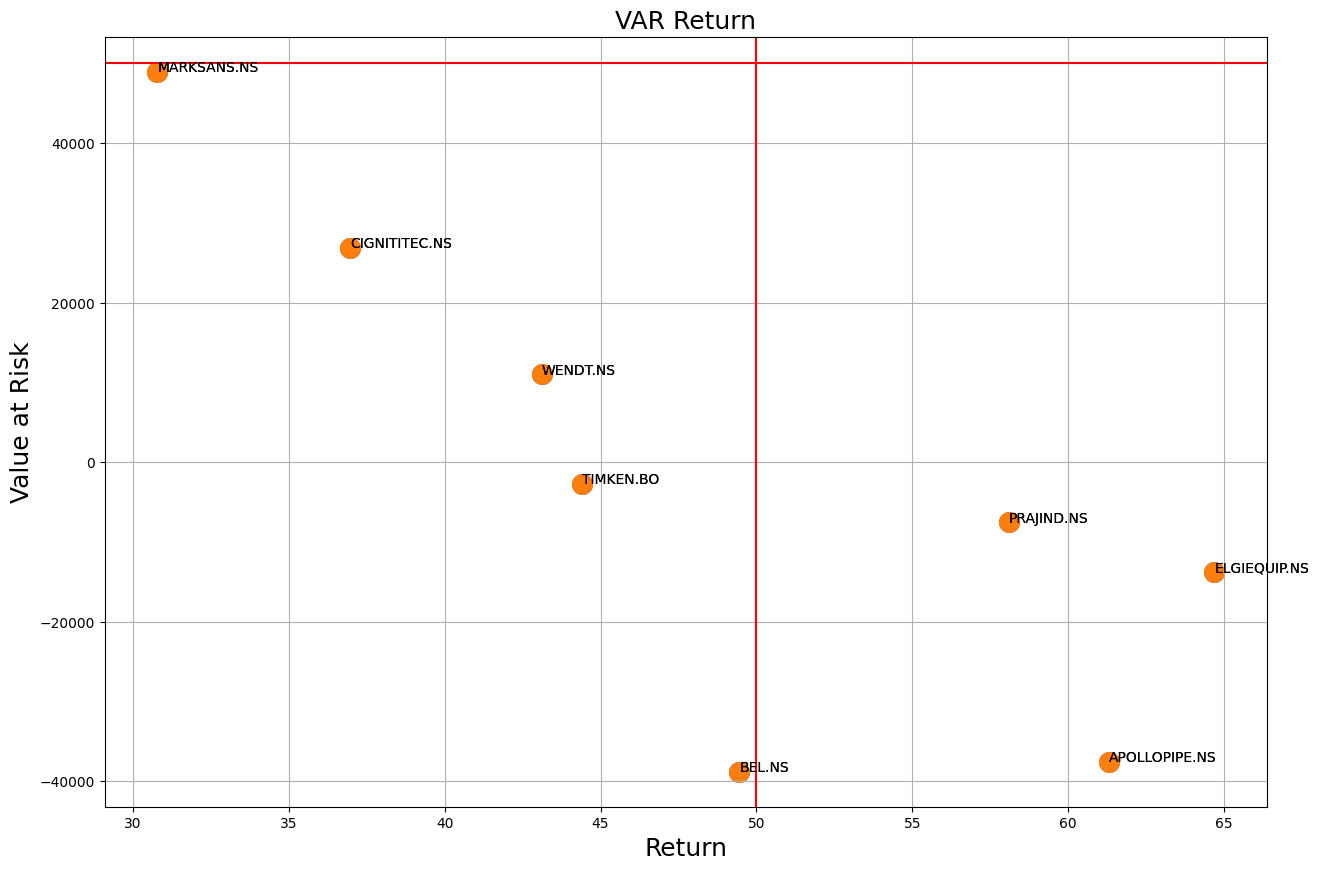

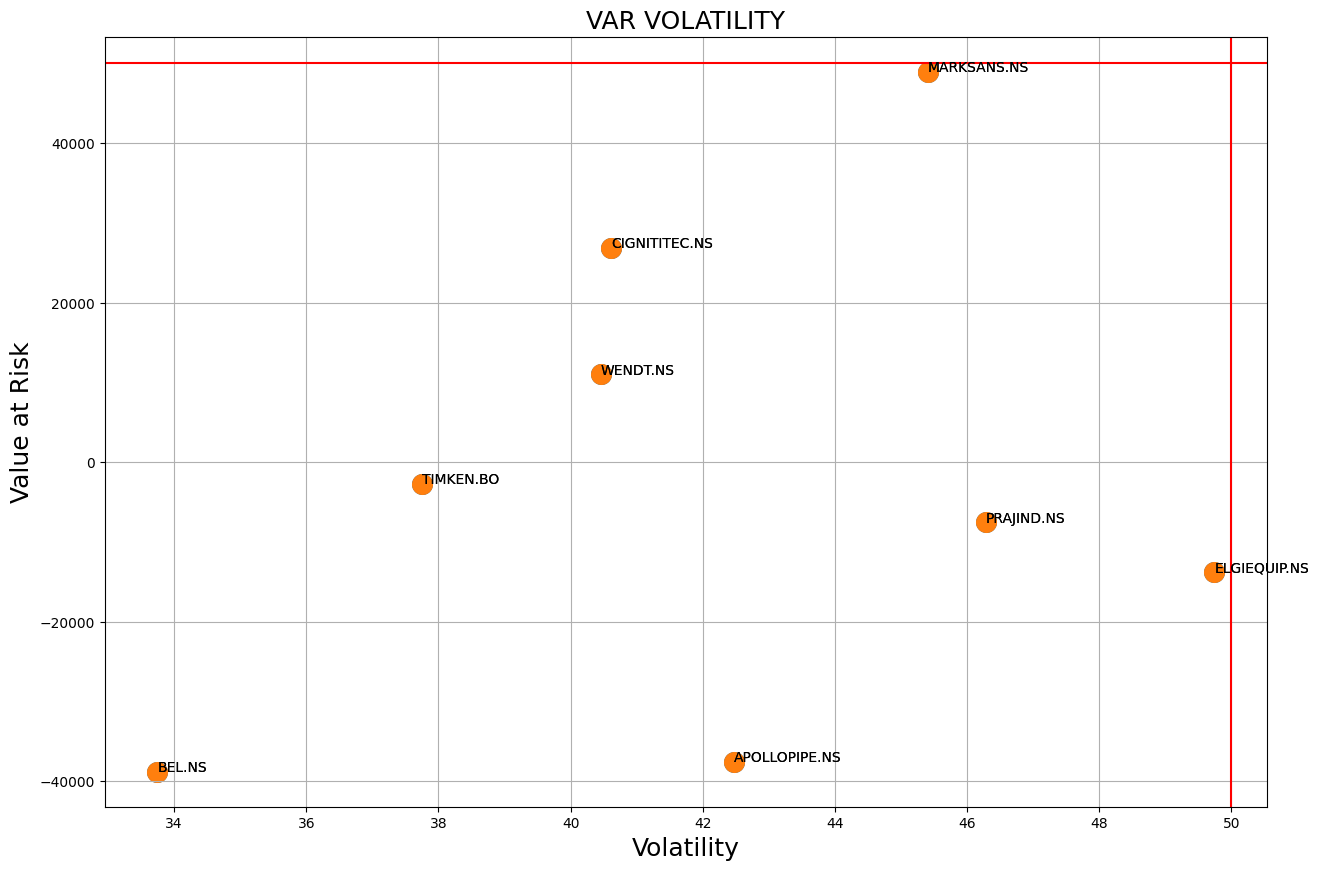

In [52]:
plt.figure(figsize=[15,10])
x= df3['Return%']
y = df3['Value at Risk']
annotations = df3["Ticker"]
plt.grid(True)
plt.title('VAR Return', fontsize=18, color='black')
plt.xlabel("Return",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

plt.figure(figsize=[15,10])
x= df3['Volatility%']
y = df3['Value at Risk']
annotations = df3["Ticker"]
plt.grid(True)
plt.title('VAR VOLATILITY', fontsize=18, color='black')
plt.xlabel("Volatility",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

In [53]:
len(df3)

8

In [54]:
df4 = df3.sort_values(by='Return%', ascending=False)

In [55]:
df4.head(40)

,level_0,index,Ticker,Cov_mar,Market_var,Beta,Volatility%,Return%,CV,Sharp Ratio,CAGR,MAXDD%,Value at Risk
0,1,8,ELGIEQUIP.NS,0.013535,0.024744,0.546987,49.740552,64.686030,76.895355,1.199947,90.788320,38.448668,-13754.640547
1,2,9,APOLLOPIPE.NS,0.017221,0.024744,0.695962,42.474398,61.294922,69.295133,1.325385,84.435325,38.477740,-37564.085985
2,3,0,PRAJIND.NS,0.023685,0.024744,0.957198,46.284616,58.092024,79.674650,1.147077,78.629308,33.285618,-7543.105943
3,5,2,BEL.NS,0.021205,0.024744,0.856956,33.747808,49.456591,68.237230,1.317318,63.870098,24.389182,-38803.382574
4,6,6,TIMKEN.BO,0.012113,0.024744,0.489526,37.753154,44.409599,85.011246,1.043876,52.106390,24.430418,-2683.387704
5,7,3,WENDT.NS,0.014803,0.024744,0.598249,40.454063,43.105964,93.847948,0.941956,53.799956,24.626962,11054.619985
6,8,4,CIGNITITEC.NS,0.012786,0.024744,0.516705,40.614214,36.975797,109.839998,0.787306,44.666799,43.136955,26906.316379
7,9,1,MARKSANS.NS,0.020970,0.024744,0.847451,45.401112,30.789041,147.458674,0.568027,35.999122,58.276045,48960.691188


In [56]:
df4.tail(30)

,level_0,index,Ticker,Cov_mar,Market_var,Beta,Volatility%,Return%,CV,Sharp Ratio,CAGR,MAXDD%,Value at Risk
0,1,8,ELGIEQUIP.NS,0.013535,0.024744,0.546987,49.740552,64.686030,76.895355,1.199947,90.788320,38.448668,-13754.640547
1,2,9,APOLLOPIPE.NS,0.017221,0.024744,0.695962,42.474398,61.294922,69.295133,1.325385,84.435325,38.477740,-37564.085985
2,3,0,PRAJIND.NS,0.023685,0.024744,0.957198,46.284616,58.092024,79.674650,1.147077,78.629308,33.285618,-7543.105943
3,5,2,BEL.NS,0.021205,0.024744,0.856956,33.747808,49.456591,68.237230,1.317318,63.870098,24.389182,-38803.382574
4,6,6,TIMKEN.BO,0.012113,0.024744,0.489526,37.753154,44.409599,85.011246,1.043876,52.106390,24.430418,-2683.387704
5,7,3,WENDT.NS,0.014803,0.024744,0.598249,40.454063,43.105964,93.847948,0.941956,53.799956,24.626962,11054.619985
6,8,4,CIGNITITEC.NS,0.012786,0.024744,0.516705,40.614214,36.975797,109.839998,0.787306,44.666799,43.136955,26906.316379
7,9,1,MARKSANS.NS,0.020970,0.024744,0.847451,45.401112,30.789041,147.458674,0.568027,35.999122,58.276045,48960.691188


In [57]:
df3.head(20)

,level_0,index,Ticker,Cov_mar,Market_var,Beta,Volatility%,Return%,CV,Sharp Ratio,CAGR,MAXDD%,Value at Risk
0,1,8,ELGIEQUIP.NS,0.013535,0.024744,0.546987,49.740552,64.686030,76.895355,1.199947,90.788320,38.448668,-13754.640547
1,2,9,APOLLOPIPE.NS,0.017221,0.024744,0.695962,42.474398,61.294922,69.295133,1.325385,84.435325,38.477740,-37564.085985
2,3,0,PRAJIND.NS,0.023685,0.024744,0.957198,46.284616,58.092024,79.674650,1.147077,78.629308,33.285618,-7543.105943
3,5,2,BEL.NS,0.021205,0.024744,0.856956,33.747808,49.456591,68.237230,1.317318,63.870098,24.389182,-38803.382574
4,6,6,TIMKEN.BO,0.012113,0.024744,0.489526,37.753154,44.409599,85.011246,1.043876,52.106390,24.430418,-2683.387704
5,7,3,WENDT.NS,0.014803,0.024744,0.598249,40.454063,43.105964,93.847948,0.941956,53.799956,24.626962,11054.619985
6,8,4,CIGNITITEC.NS,0.012786,0.024744,0.516705,40.614214,36.975797,109.839998,0.787306,44.666799,43.136955,26906.316379
7,9,1,MARKSANS.NS,0.020970,0.024744,0.847451,45.401112,30.789041,147.458674,0.568027,35.999122,58.276045,48960.691188


In [58]:
df2.head(30)

,index,Ticker,Cov_mar,Market_var,Beta,Volatility%,Return%,CV,Sharp Ratio,CAGR,MAXDD%,Value at Risk
0,5,XPROINDIA.NS,0.017417,0.024744,0.703878,57.712328,140.926070,40.952202,2.355235,308.521411,49.866774,-624069.213496
1,8,ELGIEQUIP.NS,0.013535,0.024744,0.546987,49.740552,64.686030,76.895355,1.199947,90.788320,38.448668,-13754.640547
2,9,APOLLOPIPE.NS,0.017221,0.024744,0.695962,42.474398,61.294922,69.295133,1.325385,84.435325,38.477740,-37564.085985
3,0,PRAJIND.NS,0.023685,0.024744,0.957198,46.284616,58.092024,79.674650,1.147077,78.629308,33.285618,-7543.105943
4,7,VIMTALABS.BO,0.014796,0.024744,0.597966,52.305307,51.800156,100.975193,0.894750,66.015007,40.126096,30012.825323
5,2,BEL.NS,0.021205,0.024744,0.856956,33.747808,49.456591,68.237230,1.317318,63.870098,24.389182,-38803.382574
6,6,TIMKEN.BO,0.012113,0.024744,0.489526,37.753154,44.409599,85.011246,1.043876,52.106390,24.430418,-2683.387704
7,3,WENDT.NS,0.014803,0.024744,0.598249,40.454063,43.105964,93.847948,0.941956,53.799956,24.626962,11054.619985
8,4,CIGNITITEC.NS,0.012786,0.024744,0.516705,40.614214,36.975797,109.839998,0.787306,44.666799,43.136955,26906.316379
9,1,MARKSANS.NS,0.020970,0.024744,0.847451,45.401112,30.789041,147.458674,0.568027,35.999122,58.276045,48960.691188
